In [638]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import load
from sklearn.metrics import *

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rc('font', family='GULIM')


def calculate_mae(gt, output):
    mae = mean_absolute_error(gt, output)
    return mae


def calculate_rmse(gt, output):
    rmse = np.sqrt(mean_squared_error(gt, output))
    return rmse

# Only Volatility

In [639]:
BZBZ_onlyvol = pd.read_csv('Files/BZBZ_onlyvol.csv', index_col=0)
SPBZ_onlyvol = pd.read_csv('Files/SPBZ_onlyvol.csv', index_col=0)

BZBZ_onlyvol.index = pd.to_datetime(BZBZ_onlyvol.index)
SPBZ_onlyvol.index = pd.to_datetime(SPBZ_onlyvol.index)

pred_BZBZ_onlyvol = pd.DataFrame(BZBZ_onlyvol['Predictions'])
truth_BZBZ_onlyvol = pd.DataFrame(BZBZ_onlyvol['Ground Truths'])
pred_inv2 = pd.DataFrame(SPBZ_onlyvol['Predictions'])
truth_inv2 = pd.DataFrame(SPBZ_onlyvol['Ground Truths'])

loaded_scaler_onlyvol = load('Database/Scaler/scaler_0_onlyvol.joblib')

pred1 = loaded_scaler_onlyvol.inverse_transform(pred_BZBZ_onlyvol)
truth1 = loaded_scaler_onlyvol.inverse_transform(truth_BZBZ_onlyvol)

pred_inv = pd.DataFrame(pred1, columns=pred_BZBZ_onlyvol.columns, index=pred_BZBZ_onlyvol.index)
truth_inv = pd.DataFrame(truth1, columns=truth_BZBZ_onlyvol.columns, index=truth_BZBZ_onlyvol.index)

print("Scaler object loaded successfully!")

Scaler object loaded successfully!


# Exterior

In [655]:
BZBZ_SP500 = pd.read_csv('Files/BZBZ_SP500.csv', index_col=0)
SPBZ_SP500 = pd.read_csv('Files/SPBZ_SP500_re.csv', index_col=0)
SP500 = pd.read_csv('Database/BZ_vol_SP500.csv', index_col=0)

BZBZ_SP500.index = pd.to_datetime(BZBZ_SP500.index)
SPBZ_SP500.index = pd.to_datetime(SPBZ_SP500.index)
SP500.index = pd.to_datetime(SP500.index)

pred_BZBZ_SP500 = pd.concat([BZBZ_SP500['Predictions'], SP500.iloc[:, 1:]], axis=1).dropna()
truth_BZBZ_SP500 = pd.concat([BZBZ_SP500['Ground Truths'], SP500.iloc[:, 1:]], axis=1).dropna()
pred_SPBZ_SP500 = pd.concat([SPBZ_SP500['Predictions'], SP500.iloc[:, 1:]], axis=1).dropna()
truth_SPBZ_SP500 = pd.concat([SPBZ_SP500['Ground Truths'], SP500.iloc[:, 1:]], axis=1).dropna()

loaded_scaler_SP500 = load('Database/Scaler/scaler_0_SP500.joblib')

pred3 = loaded_scaler_SP500.inverse_transform(pred_BZBZ_SP500)
truth3 = loaded_scaler_SP500.inverse_transform(truth_BZBZ_SP500)
pred4 = loaded_scaler_SP500.inverse_transform(pred_SPBZ_SP500)
truth4 = loaded_scaler_SP500.inverse_transform(truth_SPBZ_SP500)

pred_inv3 = pd.DataFrame(pred3, columns=pred_BZBZ_SP500.columns, index=pred_BZBZ_SP500.index)
truth_inv3 = pd.DataFrame(truth3, columns=truth_BZBZ_SP500.columns, index=truth_BZBZ_SP500.index)
pred_inv4 = pd.DataFrame(pred4, columns=pred_SPBZ_SP500.columns, index=pred_SPBZ_SP500.index)
truth_inv4 = pd.DataFrame(truth4, columns=truth_SPBZ_SP500.columns, index=truth_SPBZ_SP500.index)

print("Scaler object loaded successfully!")

Scaler object loaded successfully!


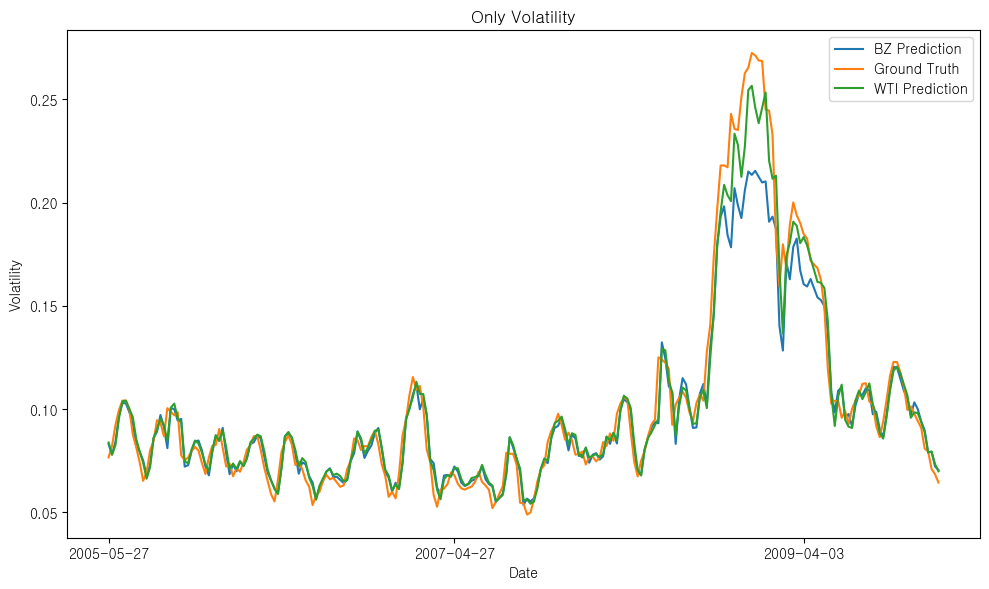

In [656]:
plt.figure(figsize=(10, 6))

plt.plot(pred_inv, label='BZ Prediction')
plt.plot(truth_inv, label='Ground Truth')
plt.plot(pred_inv2, label='WTI Prediction')

plt.title('Only Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.xticks(pred_inv.index[0:-2:100])
plt.tight_layout()
plt.show()

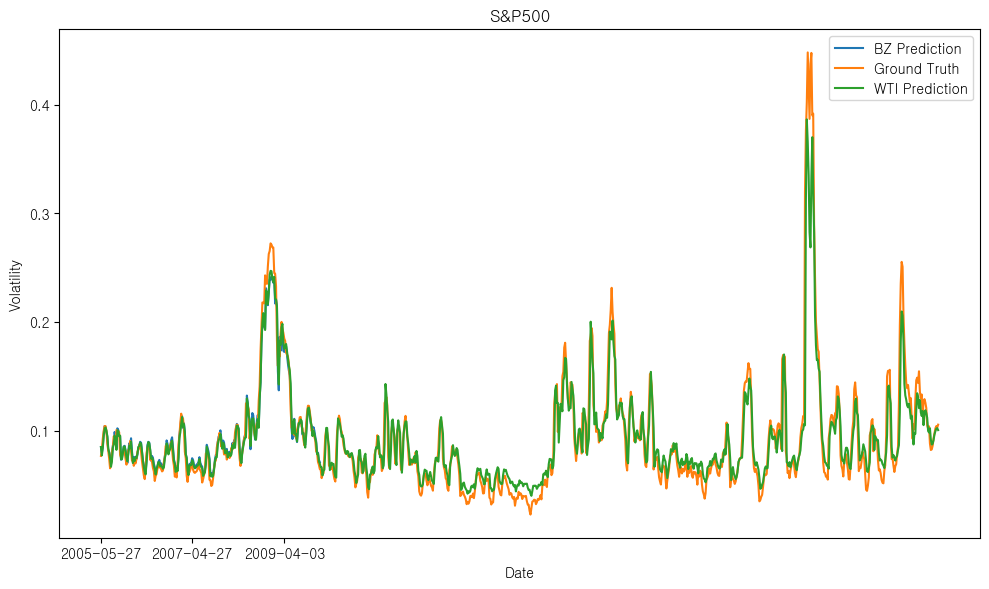

In [658]:
plt.figure(figsize=(10, 6))

plt.plot(pred_inv3.iloc[:, 0], label='BZ Prediction')
plt.plot(truth_inv4.iloc[:, 0], label='Ground Truth')
plt.plot(pred_inv4.iloc[:, 0], label='WTI Prediction')

plt.title('S&P500')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.xticks(pred_inv.index[0:-2:100])
plt.tight_layout()
plt.show()

# 전체기간

In [643]:
print('BZBZ_onlyvol_Total')
print(calculate_mae(truth_inv.values, pred_inv.values))
print(calculate_rmse(truth_inv.values, pred_inv.values))
print(f'{r2_score(truth_inv.values, pred_inv.values):.4f}')

BZBZ_onlyvol_Total
0.008749858081643086
0.014995092805457088
0.9067


In [659]:
print('SPBZ_onlyvol_Total')
print(calculate_mae(truth_inv2.values, pred_inv2.values))
print(calculate_rmse(truth_inv2.values, pred_inv2.values))
print(f'{r2_score(truth_inv2.values, pred_inv2.values):.4f}')

SPBZ_onlyvol_Total
0.006674274644307677
0.0098402080900241
0.9598


In [645]:
print('BZBZ_SP500_Total')
print(calculate_mae(truth_inv3.iloc[:,0].values, pred_inv3.iloc[:,0].values))
print(calculate_rmse(truth_inv3.iloc[:,0].values, pred_inv3.iloc[:,0].values))
print(f'{r2_score(truth_inv3.iloc[:,0].values, pred_inv3.iloc[:,0].values):.4f}')

BZBZ_SP500_Total
0.0076191735258951945
0.010847604919715493
0.9512


In [660]:
print('SPBZ_SP500_Total')
print(calculate_mae(truth_inv4.iloc[:,0].values, pred_inv4.iloc[:,0].values))
print(calculate_rmse(truth_inv4.iloc[:,0].values, pred_inv4.iloc[:,0].values))
print(f'{r2_score(truth_inv4.iloc[:,0].values, pred_inv4.iloc[:,0].values):.4f}')

SPBZ_SP500_Total
0.010049375466571567
0.01720294258408767
0.8968


# 평상시 기간

In [647]:
print('BZBZ_onlyvol_변동성 작은 부분')
print(calculate_mae(truth_inv.loc[:'2008-09-01', 'Ground Truths'].values, pred_inv.loc[:'2008-09-01', 'Predictions'].values))
print(calculate_rmse(truth_inv.loc[:'2008-09-01', 'Ground Truths'].values, pred_inv.loc[:'2008-09-01', 'Predictions'].values))

BZBZ_onlyvol_변동성 작은 부분
0.004998491029444809
0.006669943681258966


In [648]:
print('SPBZ_onlyvol_변동성 작은 부분')
print(calculate_mae(truth_inv2.loc[:'2008-09-01', 'Ground Truths'].values, pred_inv2.loc[:'2008-09-01', 'Predictions'].values))
print(calculate_rmse(truth_inv2.loc[:'2008-09-01', 'Ground Truths'].values, pred_inv2.loc[:'2008-09-01', 'Predictions'].values))

SPBZ_onlyvol_변동성 작은 부분
0.004967669015273942
0.006455865497352423


In [649]:
print('BZBZ_SP500_변동성 작은 부분')
print(calculate_mae(truth_inv3.loc[:'2008-09-01', 'Ground Truths'].values, pred_inv3.loc[:'2008-09-01', 'Predictions'].values))
print(calculate_rmse(truth_inv3.loc[:'2008-09-01', 'Ground Truths'].values, pred_inv3.loc[:'2008-09-01', 'Predictions'].values))

BZBZ_SP500_변동성 작은 부분
0.005721958877583368
0.007292129135007336


In [661]:
print('SPBZ_SP500_변동성 작은 부분')
print(calculate_mae(truth_inv4.loc[:'2008-09-01', 'Ground Truths'].values, pred_inv4.loc[:'2008-09-01', 'Predictions'].values))
print(calculate_rmse(truth_inv4.loc[:'2008-09-01', 'Ground Truths'].values, pred_inv4.loc[:'2008-09-01', 'Predictions'].values))

SPBZ_SP500_변동성 작은 부분
0.005359366444066658
0.006955645938522663


# 금융위기기간

In [651]:
print('BZBZ_onlyvol_변동성 큰 부분')
print(calculate_mae(truth_inv.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values, pred_inv.loc['2008-09-01':'2009-06-01', 'Predictions'].values))
print(calculate_rmse(truth_inv.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values, pred_inv.loc['2008-09-01':'2009-06-01', 'Predictions'].values))

BZBZ_onlyvol_변동성 큰 부분
0.02860022052041329
0.034474157106583116


In [652]:
print('SPBZ_onlyvol_변동성 큰 부분')
print(calculate_mae(truth_inv2.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values, pred_inv2.loc['2008-09-01':'2009-06-01', 'Predictions'].values))
print(calculate_rmse(truth_inv2.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values, pred_inv2.loc['2008-09-01':'2009-06-01', 'Predictions'].values))

SPBZ_onlyvol_변동성 큰 부분
0.015688214857061133
0.0197685537895628


In [653]:
print('BZBZ_SP500_변동성 큰 부분')
print(calculate_mae(truth_inv3.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values, pred_inv3.loc['2008-09-01':'2009-06-01', 'Predictions'].values))
print(calculate_rmse(truth_inv3.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values, pred_inv3.loc['2008-09-01':'2009-06-01', 'Predictions'].values))

BZBZ_SP500_변동성 큰 부분
0.017918601449920798
0.02169638409507163


In [662]:
print('SPBZ_SP500_변동성 큰 부분')
print(calculate_mae(truth_inv4.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values, pred_inv4.loc['2008-09-01':'2009-06-01', 'Predictions'].values))
print(calculate_rmse(truth_inv4.loc['2008-09-01':'2009-06-01', 'Ground Truths'].values, pred_inv4.loc['2008-09-01':'2009-06-01', 'Predictions'].values))

SPBZ_SP500_변동성 큰 부분
0.016528208585002535
0.02045392454041214
